La empresa Telecomunicaciones Innovatec S.A.C. cuenta con una red de usuarios que interactúan constantemente, intercambiando grandes cantidades de información. En los últimos meses, se han reportado problemas de saturación y desconexiones en algunos nodos clave, lo que ha generado retrasos en el flujo de datos. 

Para resolver esta situación, Innovatec desea modelar su red de usuarios mediante un grafo aleatorio y realizar un análisis que permita: 


Identificar nodos críticos que afectan la conectividad general. 
Determinar la existencia de componentes aisladas que puedan optimizarse. 
Analizar la estructura global de la red mediante métricas como centralidad, clustering y densidad. 

Archivo de datos: Se proporciona un archivo en formato CSV con 1000 filas, donde cada fila representa una conexión entre dos nodos de la red. 
Columnas del archivo: \
Origen: Nodo de origen de la conexión. \
Destino: Nodo de destino de la conexión. \
Peso: Representa la fuerza de la conexión (ejemplo: cantidad de datos transferidos). 

Descarga: grafos_aleatorios_1000_lineas.csv


In [ ]:
# 1. Importar librerías
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import community.community_louvain as community_louvain # Algoritmo Louvain

In [2]:
# 2. Leer el archivo
filename = 'https://raw.githubusercontent.com/joseluishb/caso-grafos-telecomunicaciones/refs/heads/main/grafos_aleatorios_1000_lineas.csv'
df = pd.read_csv(filename)

# 3. Crear el grafo
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row['Origen'], row['Destino'], weight=row['Peso'])

In [4]:
# Calcular métricas de centralidad
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
closeness_centrality = nx.closeness_centrality(G)

# Calcular el coeficiente de clustering
clustering_coefficient = nx.average_clustering(G)

# Calcular la densidad de la red
density = nx.density(G)

# Componentes conexas
connected_components = list(nx.connected_components(G))
num_components = len(connected_components)
largest_component_size = len(max(connected_components, key=len))

# Identificar los 5 nodos más importantes según cada métrica
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

{
    "Número de nodos": G.number_of_nodes(),
    "Número de aristas": G.number_of_edges(),
    "Densidad": round(density, 4),
    "Coeficiente de clustering promedio": round(clustering_coefficient, 4),
    "Número de componentes conexas": num_components,
    "Tamaño del componente más grande": largest_component_size,
    "Top 5 nodos por centralidad de grado": top_degree,
    "Top 5 nodos por centralidad de intermediación": top_betweenness,
    "Top 5 nodos por centralidad de cercanía": top_closeness,
}

{'Número de nodos': 100,
 'Número de aristas': 894,
 'Densidad': 0.1806,
 'Coeficiente de clustering promedio': 0.1739,
 'Número de componentes conexas': 1,
 'Tamaño del componente más grande': 100,
 'Top 5 nodos por centralidad de grado': [('Nodo_25', 0.2828282828282829),
  ('Nodo_74', 0.27272727272727276),
  ('Nodo_84', 0.27272727272727276),
  ('Nodo_10', 0.26262626262626265),
  ('Nodo_61', 0.26262626262626265)],
 'Top 5 nodos por centralidad de intermediación': [('Nodo_84',
   0.1372390081573755),
  ('Nodo_29', 0.11264344121486977),
  ('Nodo_43', 0.10459748112809336),
  ('Nodo_74', 0.10280550892795792),
  ('Nodo_65', 0.09693190407476122)],
 'Top 5 nodos por centralidad de cercanía': [('Nodo_25', 0.5823529411764706),
  ('Nodo_74', 0.5789473684210527),
  ('Nodo_84', 0.5789473684210527),
  ('Nodo_10', 0.5755813953488372),
  ('Nodo_61', 0.5755813953488372)]}

Número de nodos: 100
Número de conexiones (aristas): 894


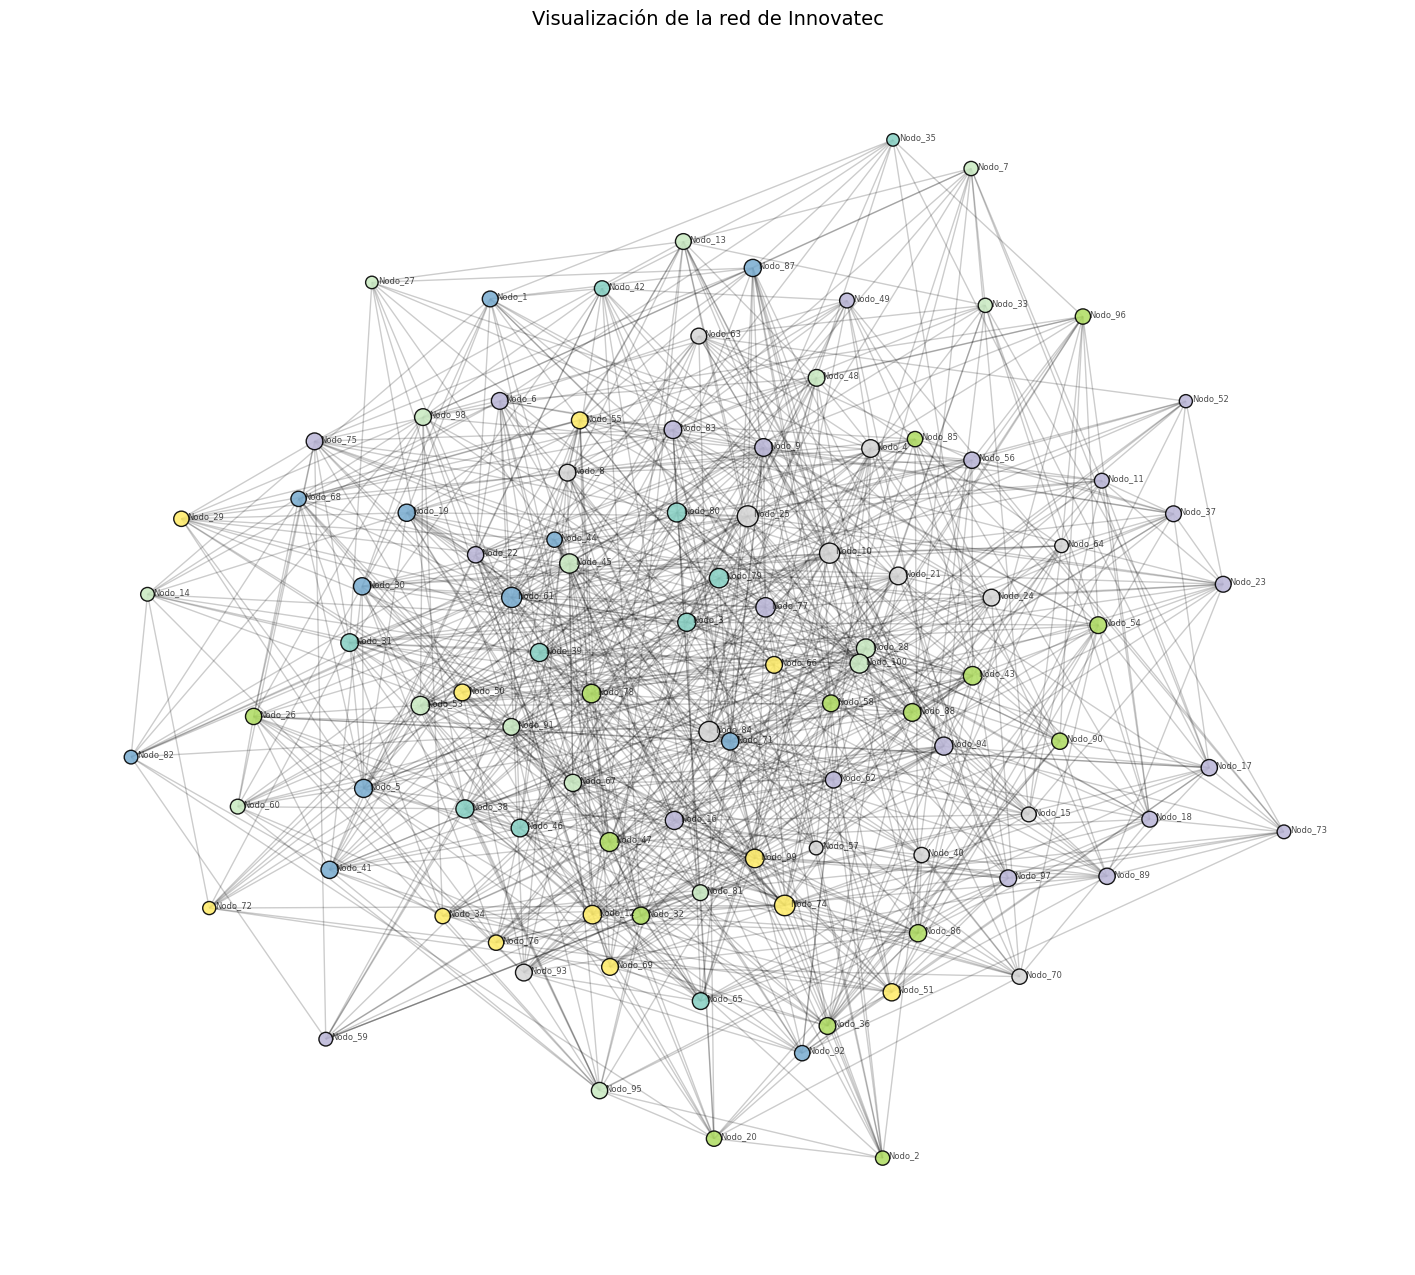

🔝 Top 10 nodos con mayor centralidad de grado:

Nodo_25: Grado=0.2828 | Comunidad=4
Nodo_74: Grado=0.2727 | Comunidad=6
Nodo_84: Grado=0.2727 | Comunidad=4
Nodo_10: Grado=0.2626 | Comunidad=4
Nodo_61: Grado=0.2626 | Comunidad=2
Nodo_45: Grado=0.2424 | Comunidad=5
Nodo_79: Grado=0.2424 | Comunidad=0
Nodo_77: Grado=0.2424 | Comunidad=1
Nodo_47: Grado=0.2323 | Comunidad=3
Nodo_28: Grado=0.2323 | Comunidad=5
📤 Resumen exportado como resumen_nodos_grafo_aleatorio.csv


In [6]:

# 4. Métricas de centralidad
centralidad_grado = nx.degree_centrality(G)
centralidad_intermediacion = nx.betweenness_centrality(G)
centralidad_eigen = nx.eigenvector_centrality(G, max_iter=500)

for nodo in G.nodes:
    G.nodes[nodo]['cent_grado'] = centralidad_grado[nodo]
    G.nodes[nodo]['cent_inter'] = centralidad_intermediacion[nodo]
    G.nodes[nodo]['cent_eigen'] = centralidad_eigen[nodo]

# 5. Comunidades (Louvain)
partition = community_louvain.best_partition(G)
for nodo in G.nodes:
    G.nodes[nodo]['comunidad'] = partition[nodo]
    
num_nodos = G.number_of_nodes()
num_aristas = G.number_of_edges()

print(f"Número de nodos: {num_nodos}")
print(f"Número de conexiones (aristas): {num_aristas}")

# 6. Layout (posición)
pos = nx.spring_layout(G, seed=42)

# 7. Visualización del grafo
colors = [partition[n] for n in G.nodes]  # color por comunidad
sizes = [centralidad_grado[n]*800 for n in G.nodes]

plt.figure(figsize=(18, 16))
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=sizes, cmap=plt.cm.Set3, alpha=0.9, edgecolors='black')
nx.draw_networkx_edges(G, pos, alpha=0.2)
for node, (x, y) in pos.items():
    plt.text(x + 0.01, y, s=node, fontsize=6, color='black', alpha=0.7)

plt.title("Visualización de la red de Innovatec", fontsize=14)
plt.axis('off')
plt.show()

# 8. Supernodos (alta centralidad)
top_grado = sorted(centralidad_grado.items(), key=lambda x: x[1], reverse=True)[:10]
print("🔝 Top 10 nodos con mayor centralidad de grado:\n")
for nodo, valor in top_grado:
    print(f"{nodo}: Grado={valor:.4f} | Comunidad={partition[nodo]}")

# 9. Exportar resumen a CSV
df_nodos = pd.DataFrame({
    'ID': list(G.nodes),
    'centralidad_grado': [centralidad_grado[n] for n in G.nodes],
    'centralidad_intermediacion': [centralidad_intermediacion[n] for n in G.nodes],
    'centralidad_eigen': [centralidad_eigen[n] for n in G.nodes],
    'comunidad': [partition[n] for n in G.nodes]
})
df_nodos.to_csv('resumen_nodos_grafo_aleatorio.csv', index=False)
print("📤 Resumen exportado como resumen_nodos_grafo_aleatorio.csv")


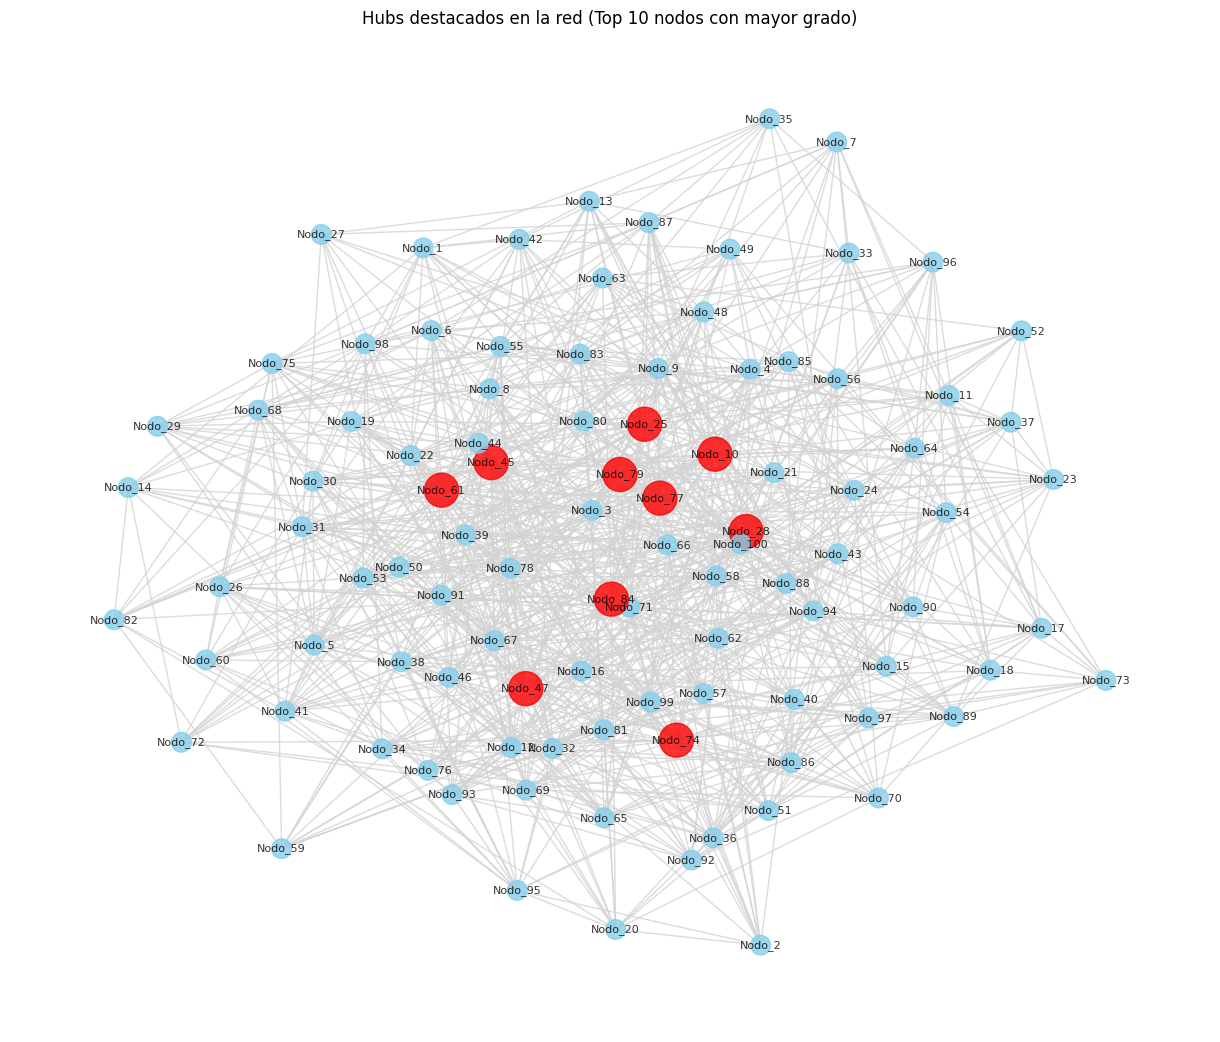

In [23]:
# Calcular el grado de todos los nodos
grado_nodos = dict(G.degree())

# Ordenar los nodos por grado en orden descendente y seleccionar los 10 primeros
nodos_ordenados_por_grado = sorted(grado_nodos.items(), key=lambda x: x[1], reverse=True)
nodos_top10_grado = nodos_ordenados_por_grado[:10]
nodos_top10_grado

# Crear una copia del grafo completo para destacar los hubs
pos = nx.spring_layout(G, seed=42)

# Definir color y tamaño según si es hub o no
node_colors = ['red' if node in dict(nodos_top10_grado) else 'skyblue' for node in G.nodes()]
node_sizes = [600 if node in dict(nodos_top10_grado) else 200 for node in G.nodes()]

# Dibujar grafo con hubs destacados
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes,
        edge_color='lightgray', alpha=0.8, font_size=8)

plt.title("Hubs destacados en la red (Top 10 nodos con mayor grado)")
plt.axis("off")
plt.show()